### Visualizing the Most Streamed Spotify Songs 2024
---
CSV File from https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024/data

In [2]:
# ============Imports============
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Most Streamed Spotify Songs 2024.csv',encoding='ISO-8859-1')
pd.set_option('display.max_columns',None)

#### Displaying missing data
---

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [8]:
def add_columns(df):
    # Getting our release date in a better format
    df['Release Date'] = pd.to_datetime(df['Release Date'], format='%m/%d/%Y')

    # Creating a column based on the year
    df['Year'] = df['Release Date'].dt.year

    # Creating a column based on the month
    df['Month'] = df['Release Date'].dt.month
    return df
def determine_season(month):
    m = int(month)
    # creating a column for season
    if m == 12 or m == 1 or m == 2:
        return 'Winter'
    if m == 3 or m == 4 or m == 5:
        return 'Spring'
    if m == 6 or m == 7 or m == 8:
        return 'Summer'
    else: 
        return 'Fall'

df = add_columns(df)
df['Season'] = df['Month'].apply(determine_season)

In [6]:
df

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track,Year,Month,Season
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",92.0,"84,274,754","1,713,126","5,767,700","651,565,900","5,332,281,936","150,597,040",210.0,"40,975",684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0,2024,4,Spring
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",92.0,"116,347,040","3,486,739","674,700","35,223,547","208,339,025","156,380,351",188.0,"40,778",3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1,2024,5,Spring
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",92.0,"122,599,116","2,228,730","3,025,400","275,154,237","3,369,120,610","373,784,955",190.0,"74,333",536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0,2024,3,Spring
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",85.0,"1,096,100,899","10,629,796","7,189,811","1,078,757,968","14,603,725,994","3,351,188,582",394.0,"1,474,799","2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0,2023,1,Winter
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",88.0,"77,373,957","3,670,188","16,400",NaN,NaN,"112,763,851",182.0,"12,185",1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1,2024,5,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,2017-09-05,QM8DG1703420,"4,585",19.4,"305,049,963","65,770","5,103,054",71.0,"149,247,747","1,397,590","48,370","20,202,000","143,934,379","53,016",3.0,6,NaN,2.0,"14,217",NaN,"20,104,066","13,184","50,633,006","656,337",NaN,1,2017,9,Fall
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,2018-07-27,INT101800122,"4,575",19.4,"52,282,360","4,602","1,449,767",56.0,"943,920,245","5,347,766",NaN,"1,721","19,935","24,973,048",1.0,412,NaN,1.0,927,NaN,NaN,NaN,NaN,"193,590",NaN,0,2018,7,Summer
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2020-02-28,USUG12000043,"4,571",19.4,"189,972,685","72,066","6,704,802",65.0,"201,027,333","1,081,402","7,596","5,288,677","36,849,005","29,253,152",19.0,204,NaN,1.0,74,6.0,"84,426,740","28,999",NaN,"1,135,998",NaN,1,2020,2,Winter
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,2016-11-08,INY091600067,"4,591",19.4,"145,467,020","14,037","7,387,064",66.0,"1,118,595,159","3,868,828","11,433","2,534,831","37,757,301","25,150,516",1.0,"1,200",NaN,NaN,NaN,7.0,"6,817,840",NaN,NaN,"448,292",NaN,0,2016,11,Fall


#### Clean data and fill in nullspaces

In [10]:
# Dropping 'TIDAL Popularity' as it contains no data

df.drop('TIDAL Popularity', axis=1)
df = df.fillna(0)

#### Top Ten Songs by Track Score (various data used)
---

In [11]:
df.head(10)

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track,Year,Month,Season
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",92.0,"84,274,754","1,713,126","5,767,700","651,565,900","5,332,281,936","150,597,040",210.0,"40,975",684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",0.0,0,2024,4,Spring
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",92.0,"116,347,040","3,486,739","674,700","35,223,547","208,339,025","156,380,351",188.0,"40,778",3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",0.0,1,2024,5,Spring
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",92.0,"122,599,116","2,228,730","3,025,400","275,154,237","3,369,120,610","373,784,955",190.0,"74,333",536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",0.0,0,2024,3,Spring
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",85.0,"1,096,100,899","10,629,796","7,189,811","1,078,757,968","14,603,725,994","3,351,188,582",394.0,"1,474,799","2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",0,"11,822,942",0.0,0,2023,1,Winter
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",88.0,"77,373,957","3,670,188","16,400",0,0,"112,763,851",182.0,"12,185",1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",0.0,1,2024,5,Spring
5,Lovin On Me,Lovin On Me,Jack Harlow,2023-11-10,USAT22311371,6,410.1,"670,665,438","105,892","175,421,034",83.0,"131,148,091","1,392,593","4,202,367","214,943,489","2,938,686,633","2,867,222,632",138.0,"522,042","4,654",86.0,"17,167,254",152.0,"138,529,362","50,982","9,438,601","4,517,131",0.0,1,2023,11,Fall
6,Beautiful Things,Beautiful Things,Benson Boone,2024-01-18,USWB12307016,7,407.2,"900,158,751","73,118","201,585,714",86.0,"308,723,145","4,120,760",0,"29,584,940","534,915,313","4,601,579,812",280.0,"383,478",429,168.0,"48,197,850",154.0,"65,447,476","57,372",0,"9,990,302",0.0,0,2024,1,Winter
7,Gata Only,Gata Only,FloyyMenor,2024-02-02,QZL382406049,8,375.8,"675,079,153","40,094","211,236,940",92.0,"228,382,568","1,439,495","3,500,000","338,546,668","3,804,584,163","2,112,581,620",160.0,"17,221",30,87.0,"33,245,595",53.0,"3,372,428","5,762",0,"6,063,523",0.0,1,2024,2,Winter
8,Danza Kuduro - Cover,ýýýýýýýýýýýýýýýýýýýýý - ýýýýýýýýýýýýýýýýýý -,MUSIC LAB JPN,2024-06-09,TCJPA2463708,9,355.7,"1,653,018,119",1,15,0.0,0,0,0,0,0,0,0.0,0,0,0.0,0,0.0,0,0,0,0,0.0,1,2024,6,Summer
9,BAND4BAND (feat. Lil Baby),BAND4BAND (feat. Lil Baby),Central Cee,2024-05-23,USSM12404354,10,330.6,"90,676,573","10,400","184,199,419",86.0,"32,735,244","988,682","325,800","121,574,500","974,656,200","174,706,874",191.0,"3,823",117,78.0,"10,800,098",92.0,"1,005,626",842,"3,679,709","666,302",0.0,1,2024,5,Spring


#### Looking at various data points for each Song

In [12]:
df.describe()

,Release Date,Track Score,Spotify Popularity,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,TIDAL Popularity,Explicit Track,Year,Month
count,4600,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.0,4600.000000,4600.000000,4600.000000
mean,2021-01-27 07:48:18.782608896,41.844043,52.402609,47.943913,25.841739,19.535217,0.0,0.358913,2020.616739,6.046304
min,1987-07-21 00:00:00,19.400000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1987.000000,1.000000
25%,2019-07-16 18:00:00,23.300000,45.000000,6.000000,1.000000,1.000000,0.0,0.000000,2019.000000,3.000000
50%,2022-06-01 00:00:00,29.900000,65.000000,22.000000,9.000000,11.000000,0.0,0.000000,2022.000000,6.000000
75%,2023-08-11 00:00:00,44.425000,71.000000,60.000000,30.000000,28.000000,0.0,1.000000,2023.000000,9.000000
max,2024-06-14 00:00:00,725.400000,96.000000,859.000000,632.000000,210.000000,0.0,1.000000,2024.000000,12.000000
std,NaN,38.543766,28.247818,69.441251,50.229711,25.181672,0.0,0.479734,3.611707,3.419663


## Artist with the Highest number of Songs in the top 4600 

In [13]:
df.Artist.value_counts().head()

Artist
Taylor Swift    63
Drake           63
Bad Bunny       60
KAROL G         32
The Weeknd      31
Name: count, dtype: int64

## Number of Songs from Each Year

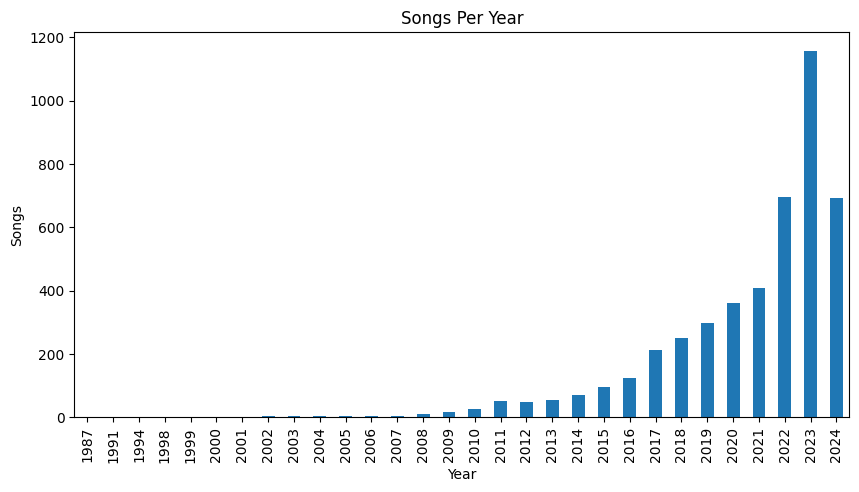

In [14]:
df['Year'] = df['Year'].astype(str)
songs_yearly = df['Year'].value_counts().sort_index()

plt.figure(figsize=(10,5))
songs_yearly.plot(kind='bar')
plt.title('Songs Per Year')
plt.xlabel('Year')
plt.ylabel('Songs')
plt.show()

## Number of Songs per Season

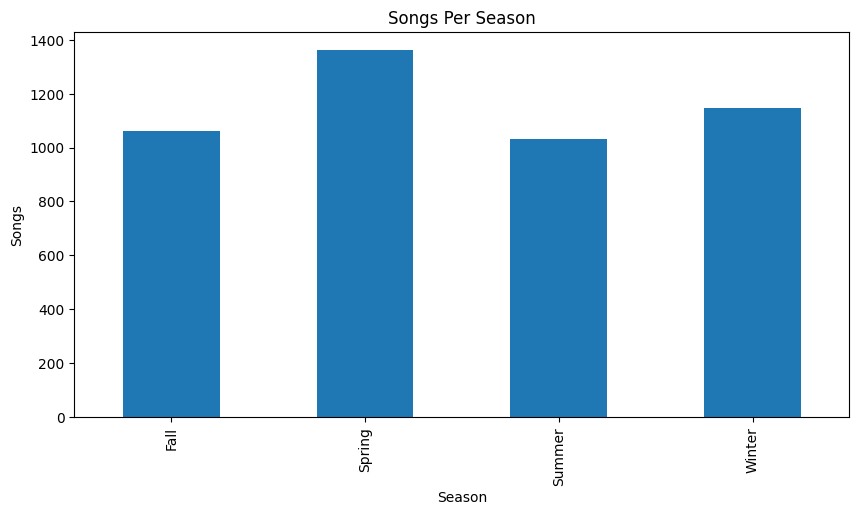

In [77]:
df['Season'] = df['Season'].astype(str)
season_songs = df['Season'].value_counts().sort_index()
plt.figure(figsize=(10,5))
season_songs.plot(kind='bar')
plt.title('Songs Per Season')
plt.xlabel('Season')
plt.ylabel('Songs')
plt.show()